# Feature Transformation

We have a nonlinear dataset and use simple linear models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


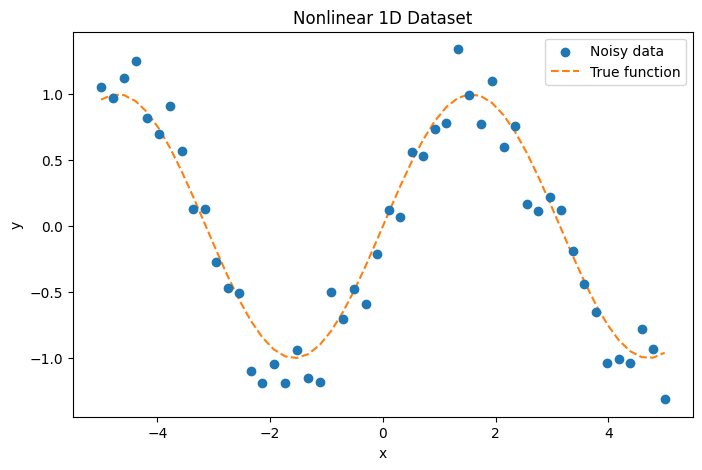

In [ ]:
np.random.seed(42)  # reproducible

N = 50
x = np.linspace(-5, 5, N)

y_true = np.sin(x)
noise = 0.2 * np.random.randn(N)
y = y_true + noise

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='C0', label='Noisy data', zorder=2)
plt.plot(x, y_true, color='C1', linestyle='--', label='True function', zorder=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear 1D Dataset')
plt.legend()
plt.show()

Let's try to fit a linear regression model on the raw data

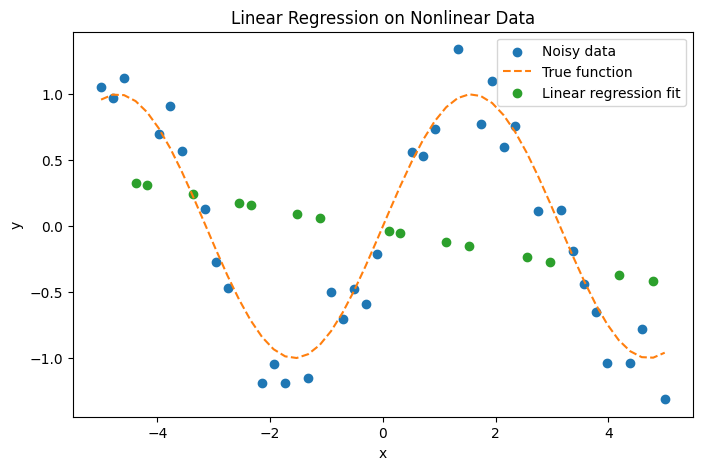

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_lin_pred = lin_model.predict(X_test)
mse_lin = mean_squared_error(y_test, y_lin_pred)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='C0', label='Noisy data')
plt.plot(x, y_true, color='C1', linestyle='--', label='True function')
plt.scatter(X_test, y_lin_pred, color='C2', label='Linear regression fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression on Nonlinear Data')
plt.legend()
plt.show()

Linear regression on raw features fails to capture the pattern and underfits the data.

Now lets transform the features using polynomial basis function.

e.g. with degree 2, $x, y$ becomes $x, y, x^2, xy, y^2$

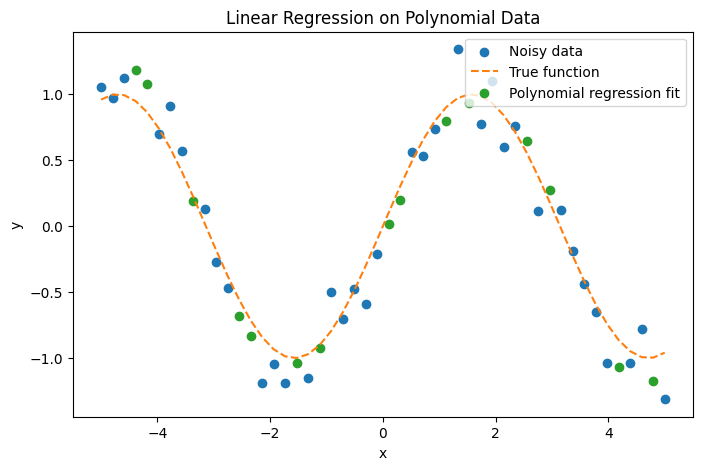

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 5
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_poly_pred = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_poly_pred)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='C0', label='Noisy data')
plt.plot(x, y_true, color='C1', linestyle='--', label='True function')
plt.scatter(X_test, y_poly_pred, color='C2', label='Polynomial regression fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression on Polynomial Data')
plt.legend()
plt.show()

Transforming the input with polynomial basis functions allows the linear model to fit the data much better.

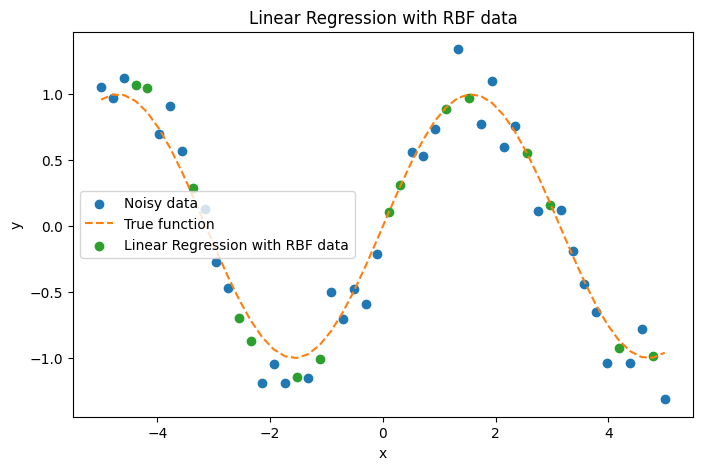

In [ ]:
n_basis_functions = 20
gamma = 0.01

rbf_feature = RBFSampler(gamma=gamma, n_components=n_basis_functions, random_state=42)
X_train_rbf = rbf_feature.fit_transform(X_train)
X_test_rbf = rbf_feature.transform(X_test)

rbf_model = LinearRegression()
rbf_model.fit(X_train_rbf, y_train)
y_rbf_pred = rbf_model.predict(X_test_rbf)
mse_rbf = mean_squared_error(y_test, y_rbf_pred)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='C0', label='Noisy data')
plt.plot(x, y_true, color='C1', linestyle='--', label='True function')
plt.scatter(X_test, y_rbf_pred, color='C2', label='Linear Regression with RBF data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with RBF data')
plt.legend()
plt.show()

Using RBF (radial basis) features gives a similarly good fit, slightly smoother than the polynomial fit. (The smoothness depends on $\gamma$)

In [ ]:
print("Mean Squared Errors on Test Set:")
print(f"Linear:     {mse_lin:.4f}")
print(f"Polynomial: {mse_poly:.4f}")
print(f"RBF:        {mse_rbf:.4f}")

Mean Squared Errors on Test Set:
Linear:     0.6026
Polynomial: 0.0390
RBF:        0.0334


#### Conclusions

Feature transformations enable linear models to fit nonlinear data.

Polynomial and RBF features perform much better than raw features.

RBF features provide smooth approximations and can be tuned via the number of basis functions and γ.

(note that I chose the feature transform hyperparameters randomly for simplicity. The optimal ones could differ a lot)